# Test energy and lifetime fits

### Author: JJGC

In [22]:
import time
print("Last updated on ", time.asctime())

Last updated on  Sat Aug  4 11:33:27 2018


In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

### General imports

In [24]:
import os
import datetime 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

### Imports from IC

In [25]:
from   invisible_cities.evm  .ic_containers  import Measurement

### Local imports

In [26]:
from krcal.core.fit_energy_functions import gaussian_parameters
from krcal.core.histo_functions      import h1
from krcal.core.histo_functions      import h1d
from krcal.core.histo_functions      import plot_histo
from krcal.core.fit_histograms       import gaussian_histo_example
from krcal.core.fit_energy_functions import fit_energy
from krcal.core.fit_energy_functions import plot_fit_energy
from krcal.core.fit_energy_functions import plot_fit_energy_chi2
from krcal.core.fit_energy_functions import print_fit_energy
from krcal.core.fit_energy_functions import fit_gaussian_experiments
from krcal.core.fit_energy_functions import gaussian_params_from_fcs
from krcal.core.stat_functions       import gaussian_experiment
from krcal.core.stat_functions       import gaussian_experiments
from krcal.core.stat_functions       import gaussian_experiments_variable_mean_and_std
from krcal.core.stat_functions       import energy_lt
from krcal.core.stat_functions       import smear_e
from krcal.core.stat_functions       import energy_lt_experiment
from krcal.core.stat_functions       import energy_lt_experiments
from krcal.core.fit_histograms       import histo_gaussian_experiment_sample
from krcal.core.fit_histograms       import histo_gaussian_params_and_pulls
from krcal.core.fit_histograms       import histo_lt_params_and_pulls
from krcal.core.fit_lt_functions     import fit_lifetime
from krcal.core.fit_lt_functions     import fit_lifetime_experiments
from krcal.core.fit_lt_functions     import lt_params_from_fcs
from krcal.core.fit_lt_functions     import plot_fit_lifetime
from krcal.core.fit_lt_functions     import print_fit_lifetime
from krcal.core.fit_lt_functions     import plot_fit_lifetime_chi2

In [27]:
from krcal.core.kr_types import PlotLabels
from krcal.core.kr_types import FitType
from krcal.core          import fit_functions_ic as fitf

## Gaussian fits

### First example:
- Generate guassian data
- histogram
- fit a gaussian
- plot fit
- print fit

#### Generate gaussian data

In [15]:
Nevt  = 1e6
mean = 100
sigma = 10
e = gaussian_experiment(nevt=Nevt, mean=mean, std=sigma)

#### Compute a gaussian seed. 

- Notice that mean and sigma of gaussian seed are close to true values, with small errors

In [16]:
seed = gaussian_parameters(e, (0,200), 1)
print(seed)

GaussPar(mu=Measurement(value=100.00217680667802, uncertainty=0.009994627651664985), std=Measurement(value=9.994627651664985, uncertainty=0.0070672725215640345), amp=Measurement(value=39915.67212961392, uncertainty=0.017715025127075134))


#### Histogramming the gaussian distribution

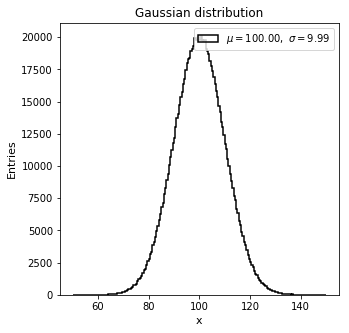

In [17]:
r = mean - 5 * sigma, mean + 5 * sigma
h1d(e, bins=200, range = r, pltLabels=PlotLabels(x='x', y='Entries', title='Gaussian distribution'),  figsize=(5,5))

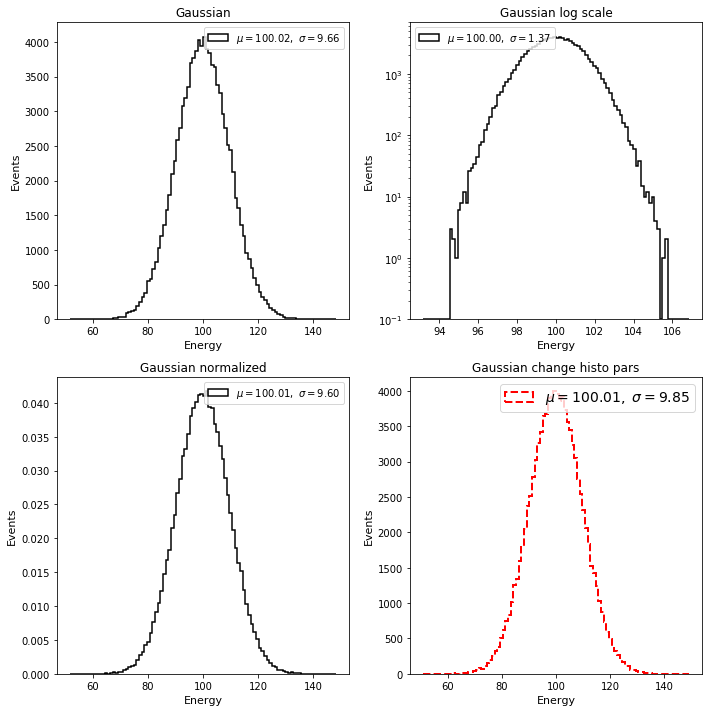

In [19]:
gaussian_histo_example(mean = 100, nevt=1e+5)

#### Fitting a gaussian to the distribution

In [20]:
fc = fit_energy(e, nbins=100, range=(0,200), n_sigma =3)

  Fit was valid = True
 Emu       = 100.00033265569957 +-0.010163206191463485 
 E sigma   = 10.013240953525749 +-0.007619733331463092 
 chi2    = 0.77114849295939 
 sigma E/E (FWHM)     (%) =23.531037963446558
 sigma E/E (FWHM) Qbb (%) =3.039079587785838 


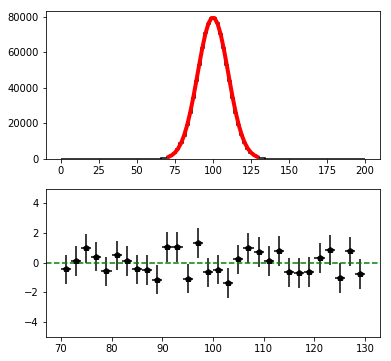

In [28]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(2, 1, 1)
plot_fit_energy(fc)
ax = fig.add_subplot(2, 1, 2)
plot_fit_energy_chi2(fc)
print_fit_energy(fc)

### run many gaussian experiments and show the pull

In [45]:
mean = 1e+4
std  = 0.02
sigma = mean * std
exps = gaussian_experiments(mexperiments = 1000, nsample =1000, mean=mean, std = sigma)

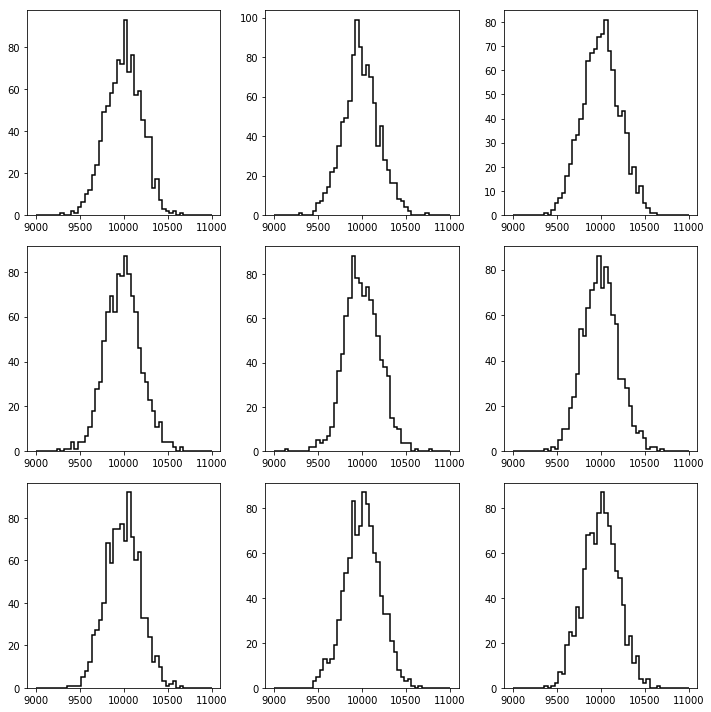

In [46]:
histo_gaussian_experiment_sample(exps, mexperiments = 1000, bins = 50, range_e = (9e+3,11e+3), samples=9, canvas=(3,3), figsize=(10,10))

In [33]:
fcs = fit_gaussian_experiments(exps, nbins = 50, range =(9e+3, 11e+3), n_sigma =3)

In [35]:
mus, umus, stds, ustds, chi2s = gaussian_params_from_fcs(fcs)

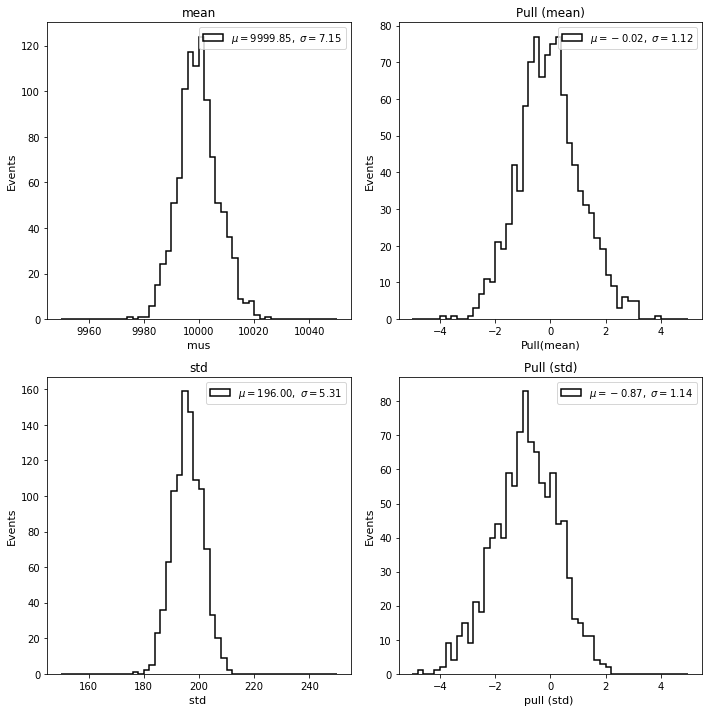

In [36]:
histo_gaussian_params_and_pulls(mean, sigma, mus, umus, stds, ustds, figsize=(10,10))

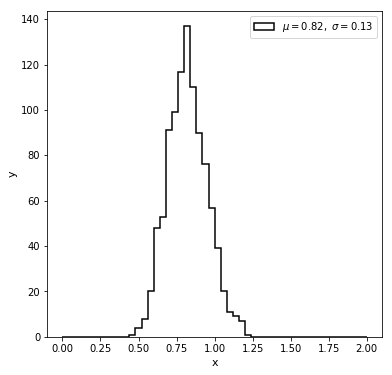

In [39]:
h1d(chi2s, bins = 50, range =(0,2))

### Show that the difference between the gaussian parameters estimated with a fit and the statistical estimator (mean, std) is gaussian

In [48]:
exps = gaussian_experiments_variable_mean_and_std(mexperiments = 1000,
                                                  nsample      = 100,
                                                  mean_range   = (100, 1000),
                                                  std_range    = (1, 50))

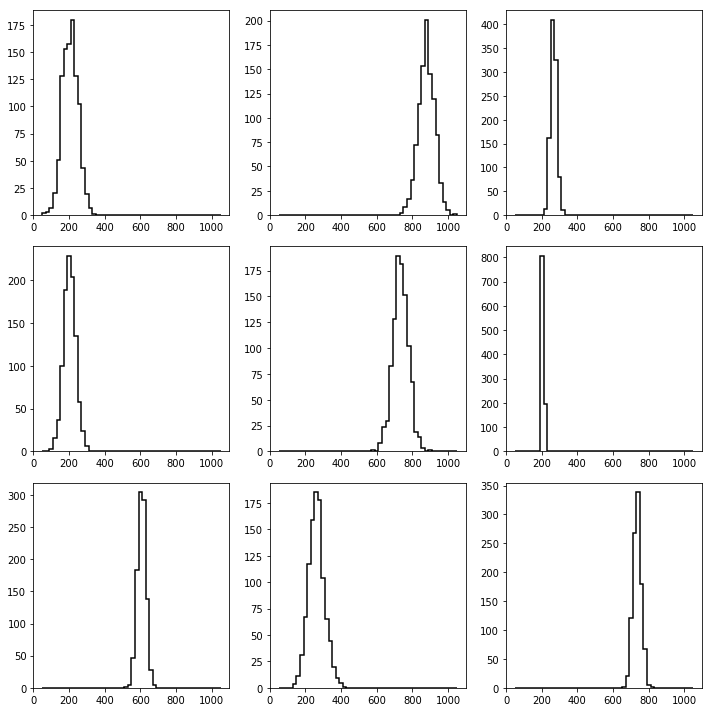

In [49]:
histo_gaussian_experiment_sample(exps, mexperiments = 1000, bins = 50, range_e = (50,1050), samples=9, canvas=(3,3), figsize=(10,10))

In [22]:
Nevt  = int(1e3)
sigmas = np.random.uniform(low=1.0, high=50., size=100)
means  = np.random.uniform(low=100, high=1000., size=100)

SEED = []
MU = []
STD = []
AVG = []
RMS = []
CHI2 = []
n_sigma =3
for sigma in sigmas:
    for mean in means:
        SEED.append(Measurement(mean, sigma))
        e  = np.random.normal(mean, sigma, Nevt)
        r = mean - n_sigma * sigma, mean + n_sigma * sigma
        bin_size = (r[1] - r[0]) / 50
        gp = gaussian_parameters(e, range = r, bin_size=bin_size)
        try:
            fc = fit_energy(e, nbins=50, range=r, n_sigma = n_sigma)
        except TypeError:
            print(f'fit failed with TypeError for mean = {mean}, sigma ={sigma}')
            raise
        
        MU.append(Measurement(fc.fr.par[1], fc.fr.err[1]))
        STD.append(Measurement(fc.fr.par[2], fc.fr.err[2] ))
        AVG.append(gp.mu)
        RMS.append(gp.std)

        CHI2.append(fc.fr.chi2)
        
print(len(MU))




 fit failed for seed  = GaussPar(mu=Measurement(value=614.675657198016, uncertainty=0.3488857182855868), std=Measurement(value=11.010647548893536, uncertainty=0.24682339570289755), amp=Measurement(value=49.74779155370826, uncertainty=0.6186945025093187)), due to RunTimeWarning, retry fit 
10000


In [23]:
mean = np.array([x.value for x in SEED])
sigma = np.array([x.uncertainty for x in SEED])

In [24]:
avg = np.array([x.value for x in AVG])
avg_u = np.array([x.uncertainty for x in AVG])
rms = np.array([x.value for x in RMS])
rms_u = np.array([x.uncertainty for x in RMS])

In [25]:
mu = np.array([x.value for x in MU])
mu_u = np.array([x.uncertainty for x in MU])
std = np.array([x.value for x in STD])
std_u = np.array([x.uncertainty for x in STD])

#### The avg and rms of the gaussian distributions are slighly better behaved that those of the fits

- Pull is better for the avg and the rms than for the mu and std
- mu is unbiased in both cases but rms less umbiased than std

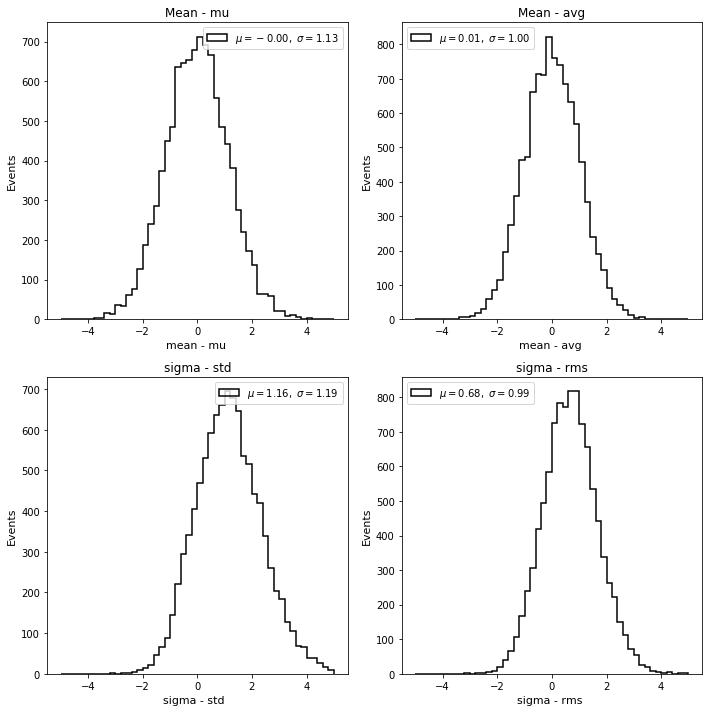

In [26]:
fig = plt.figure(figsize=(10,10))
  
ax      = fig.add_subplot(2, 2, 1)
pltLabels =PlotLabels(x='mean - mu ', y='Events', title='Mean - mu')
(_) = h1((mean-mu) / mu_u, bins=50, range=(-5,5))
plot_histo(pltLabels, ax)

ax      = fig.add_subplot(2, 2, 2)
(_)  = h1((mean-avg) / avg_u, bins=50, range=(-5,5))
pltLabels =PlotLabels(x='mean - avg ', y='Events', title='Mean - avg')
plot_histo(pltLabels, ax, legendloc='upper left')

ax      = fig.add_subplot(2, 2, 3)
pltLabels =PlotLabels(x='sigma - std  ', y='Events', title='sigma - std')
(_)  = h1((sigma-std) / std_u, bins=50, range=(-5,5))
plot_histo(pltLabels, ax)

ax      = fig.add_subplot(2, 2, 4)
(_)  = h1((sigma-rms) / rms_u, bins=50, range=(-5,5))
pltLabels =PlotLabels(x='sigma - rms ', y='Events', title='sigma - rms')
plot_histo(pltLabels, ax, legendloc='upper left')


plt.tight_layout()


### An alternative (fast) way of fitting a gaussian. 

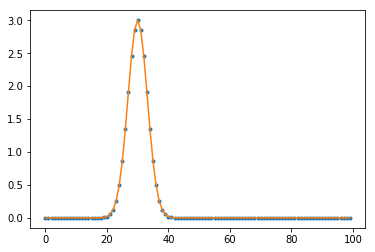

In [27]:
gaussian = lambda x: 3*np.exp(-(30-x)**2/20.)

data = gaussian(np.arange(100))

plt.plot(data, '.')

X = np.arange(data.size)
x = np.sum(X*data)/np.sum(data)
width = np.sqrt(np.abs(np.sum((X-x)**2*data)/np.sum(data)))

max = data.max()

fit = lambda t : max*np.exp(-(t-x)**2/(2*width**2))

plt.plot(fit(X), '-')

## Exponential fits

In [42]:
Nevt  = int(1e5)
e0 = 1e+4 # pes
std = 0.02 * e0
lt = 2000 # lifetime in mus
nbins_z = 12

### generate data

In [45]:
z, es = energy_lt_experiment(Nevt, e0, lt, std)                         

In [46]:
xs, ys, yus     = fitf.profileX(z, es, nbins_z)

### Histograms

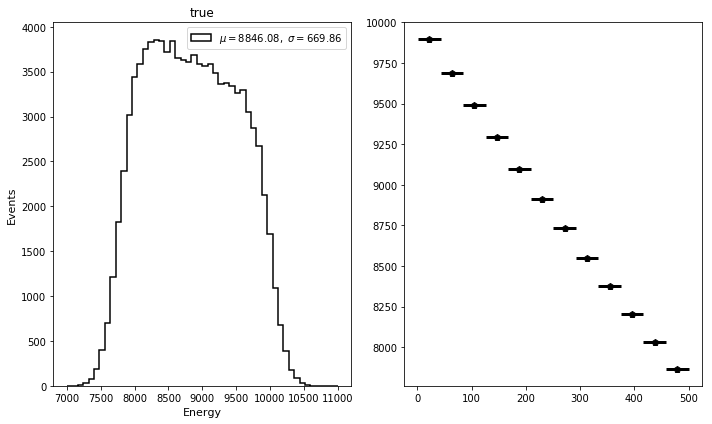

In [49]:
fig = plt.figure(figsize=(10,6 ))
pltLabels =PlotLabels(x='Energy', y='Events', title='true')
ax      = fig.add_subplot(1, 2, 1)
(_)     = h1(es, bins=50, range=(7e+3,11e+3))
plot_histo(pltLabels, ax)

ax      = fig.add_subplot(1, 2, 2)
plt.errorbar(xs, ys, yus, np.diff(xs)[0]/2, fmt="kp", ms=7, lw=3)

plt.tight_layout()

### Fit lifetime  data to binned and unbinned mode

In [64]:

ti = time.time()
fc = fit_lifetime(z, es, fit = FitType.profile, nbins_z=nbins_z, nbins_e=50, range_z=(0, 500), range_e=(7000, 11000))
tf = time.time()
print(f't = {tf -ti}')

t = 0.011952877044677734


In [65]:
ti = time.time()
fcu = fit_lifetime(z, es, fit = FitType.unbined, nbins_z=nbins_z, nbins_e=50, range_z=(0, 500), range_e=(7000, 11000))
tf = time.time()
print(f't = {tf -ti}')

t = 0.017010927200317383


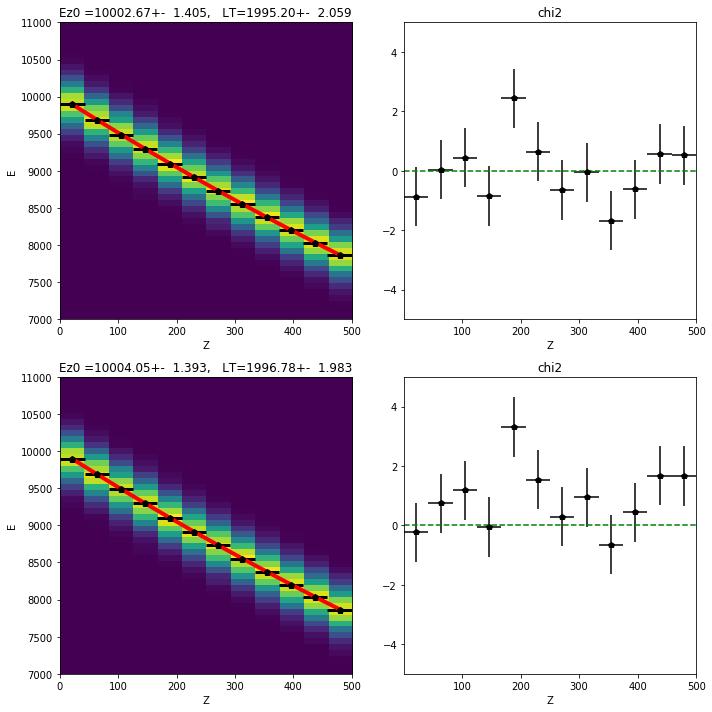

In [66]:
fig = plt.figure(figsize=(10,10))
ax      = fig.add_subplot(2, 2, 1)
plot_fit_lifetime(fc)

ax      = fig.add_subplot(2, 2, 2)
plot_fit_lifetime_chi2(fc)

ax      = fig.add_subplot(2, 2, 3)
plot_fit_lifetime(fcu)

ax      = fig.add_subplot(2, 2, 4)
plot_fit_lifetime_chi2(fcu)

plt.tight_layout()


In [67]:
print_fit_lifetime(fc)

 Ez0     = 10002.66966517408 +-1.4045481344406392 
 LT      = 1995.203923722596 +-2.0587006790576616 
 chi2    = 0.9394824606267761 


In [68]:
print_fit_lifetime(fcu)

 Ez0     = 10004.052217138385 +-1.3926867366068632 
 LT      = 1996.7802492111668 +-1.983406127546492 
 chi2    = 2.052173383884269 


### Run experiments

In [70]:
mexperiments = 1e+3
nsample      = 1e+3
zs, es = run_energy_lt_experiments(mexperiments, nsample, e0, lt, std)

In [74]:
fcp = fit_lifetime_experiments(zs, es, fit=FitType.profile,nbins_z=12)

In [75]:
fcu = fit_lifetime_experiments(zs, es, fit=FitType.unbined,nbins_z=12)

In [78]:
e0s, ue0s, lts,ults = lt_params_from_fcs(fcp)

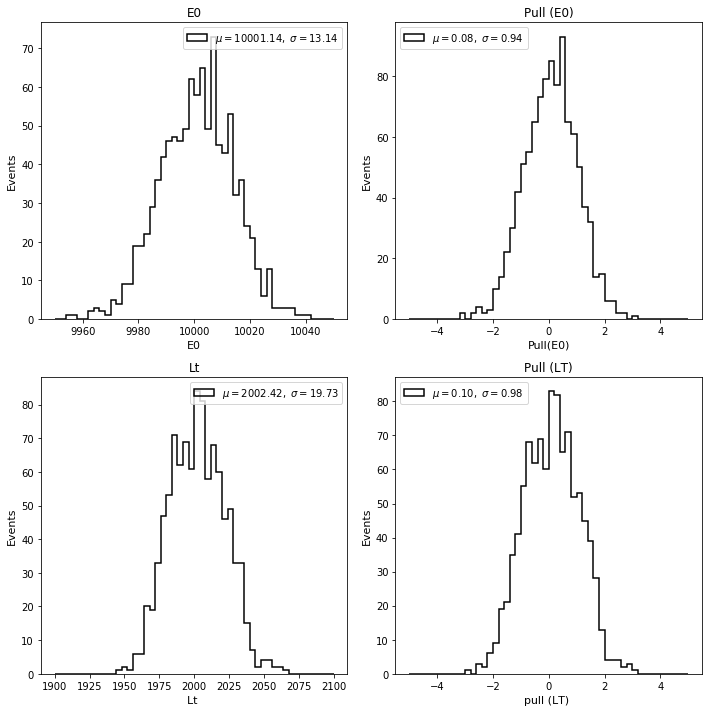

In [83]:
histo_lt_params_and_pulls(e0, lt, e0s,ue0s,lts,ults, figsize=(10,10))

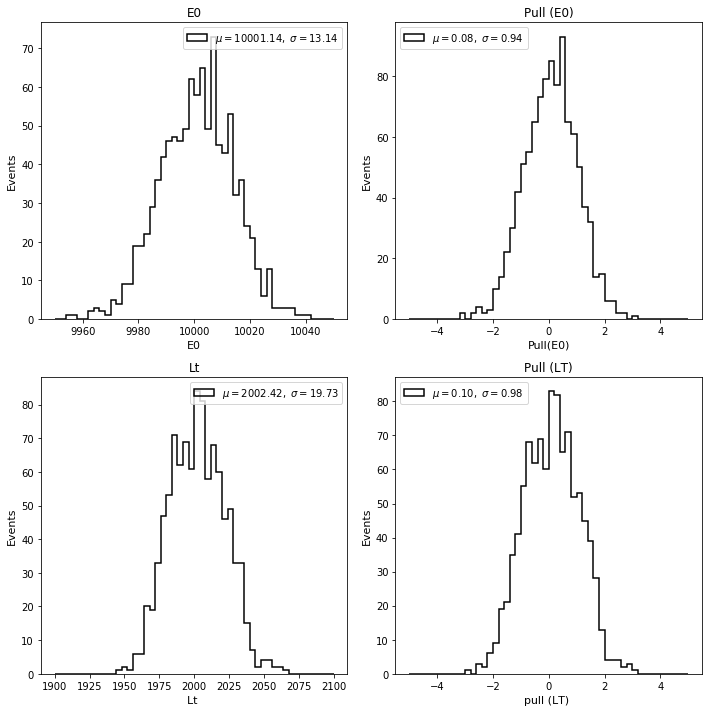

In [84]:
e0s, ue0s, lts,ults = lt_params_from_fcs(fcu)
histo_lt_params_and_pulls(e0, lt, e0s,ue0s,lts,ults, figsize=(10,10))